In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the figure size to (12, 6)
plt.rcParams['figure.figsize'] = (12,6)

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [4]:
    df = pd.read_csv('train.csv', index_col=0, parse_dates=True)
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


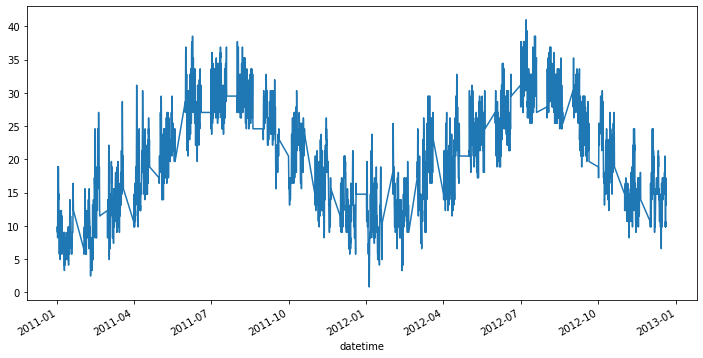

In [6]:
df['temp'].plot()

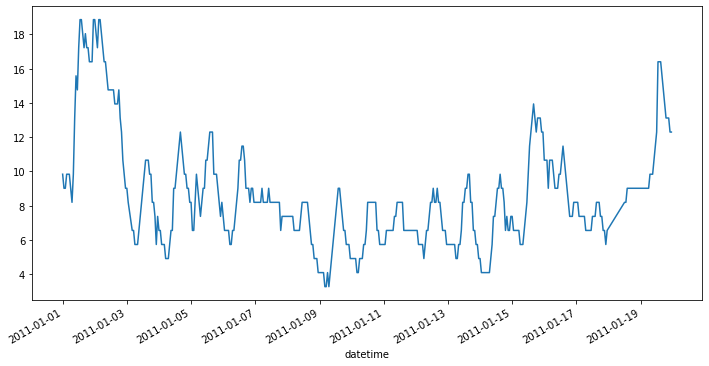

In [7]:
df['2011-01-01':'2011-01-20']['temp'].plot()

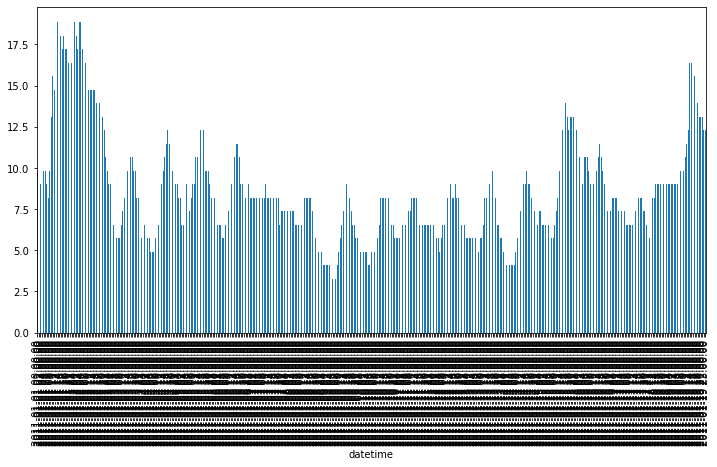

In [12]:
df['2011-01-01':'2011-01-20']['temp'].plot.bar()

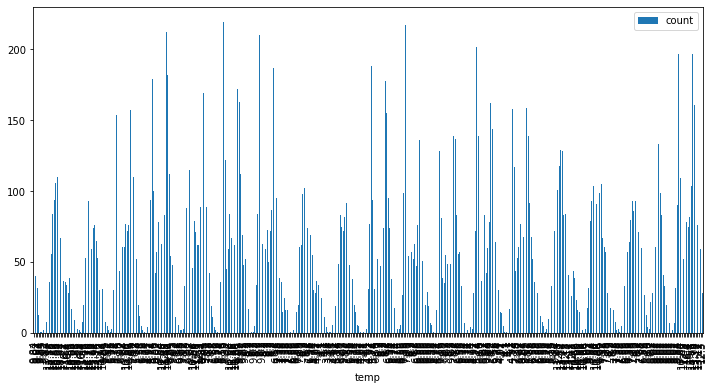

In [13]:
df['2011-01-01':'2011-01-20'].plot.bar(x='temp',y='count')

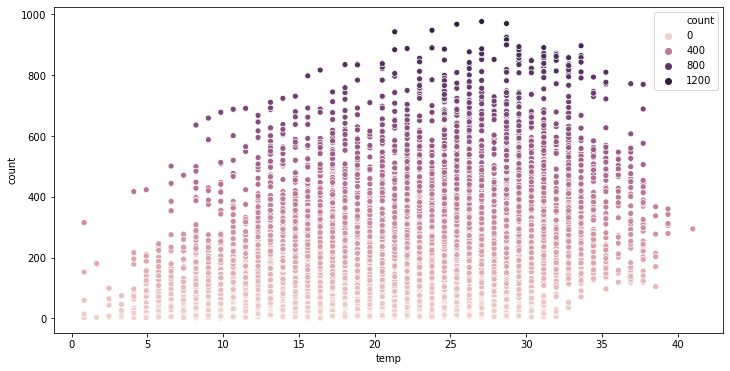

In [14]:
sns.scatterplot(x='temp', y='count', data=df, hue='count')

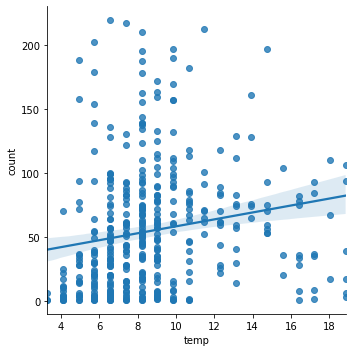

In [16]:
sns.lmplot(x='temp', y='count', data=df['2011-01-01':'2011-01-20'])

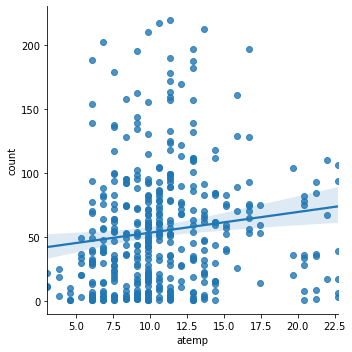

In [17]:
sns.lmplot(x='atemp', y='count', data=df['2011-01-01':'2011-01-20'])

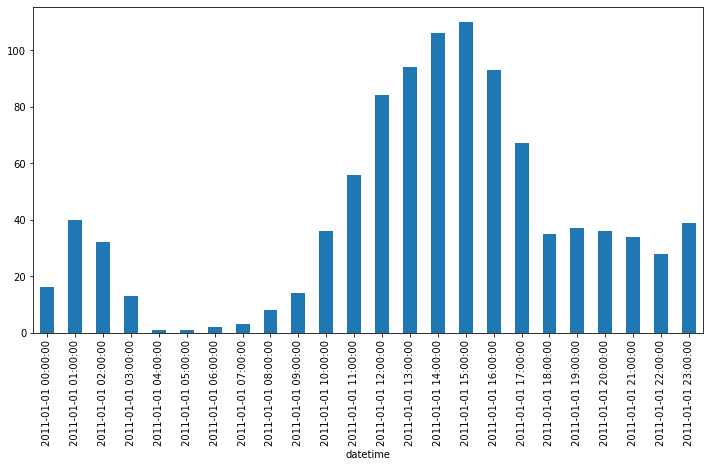

In [19]:
df['2011-01-01':'2011-01-01']['count'].plot.bar()          # daily rental, hourly count, 2011-01-01

In [13]:
df.between_time(start_time='10:00:00', end_time='11:00:00')['count'].mean()

192.88351648351647

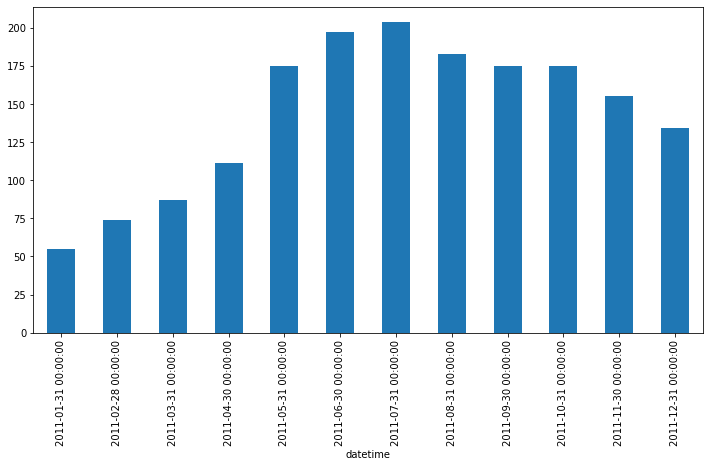

In [14]:
df['2011-01-01':'2011-12-31'].resample('M')['count'].mean().plot.bar()   # monthly means, 2011

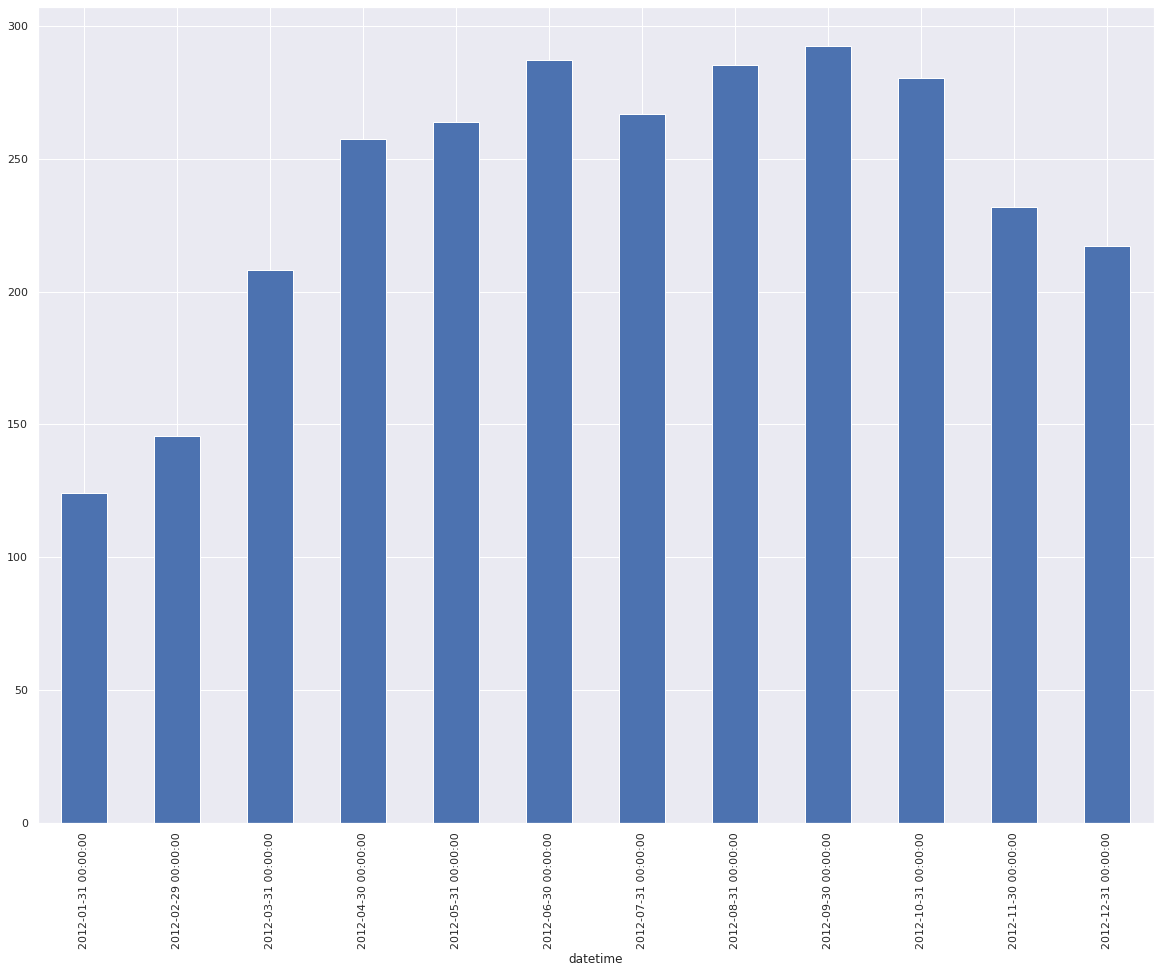

In [47]:
df['2012-01-01':'2012-12-31'].resample('M')['count'].mean().plot.bar()   # monthly means, 2012

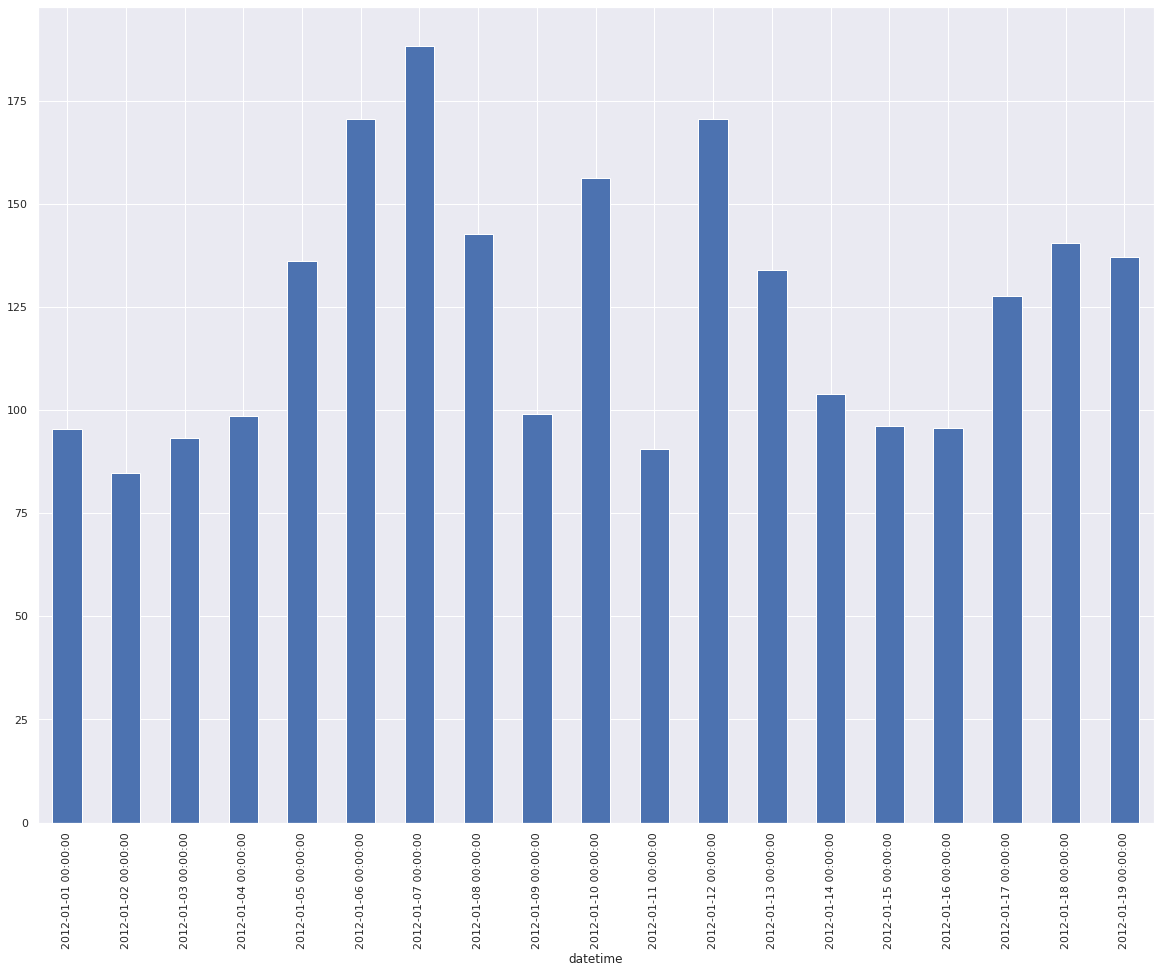

In [56]:
df['2012-01-01':'2012-01-20'].resample('D')['count'].mean().plot.bar()   # daily means, 2012 jan

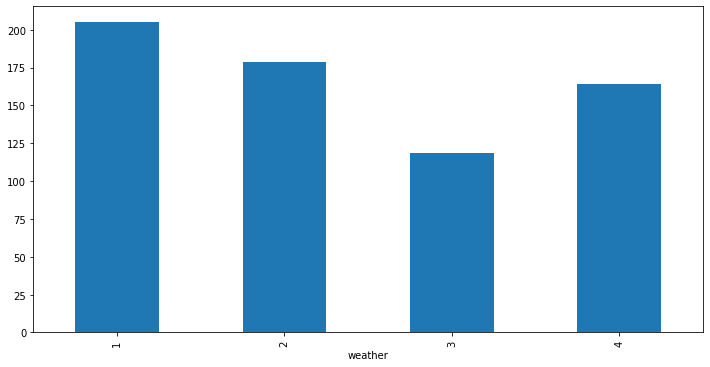

In [16]:
df.groupby('weather')['count'].mean().plot.bar()

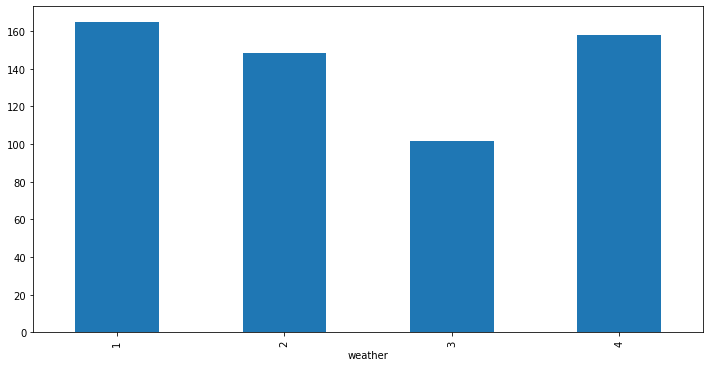

In [17]:
df.groupby('weather')['registered'].mean().plot.bar()

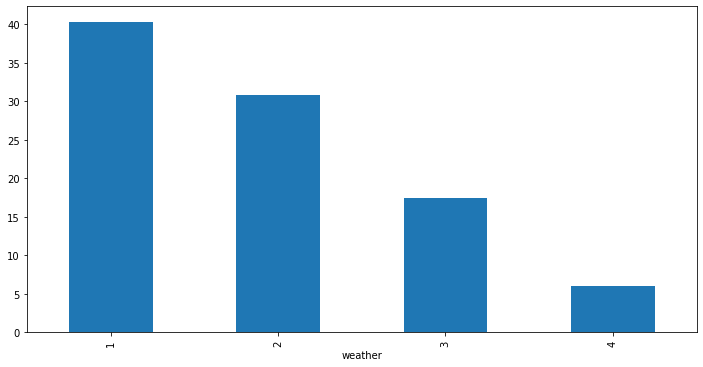

In [18]:
df.groupby('weather')['casual'].mean().plot.bar()

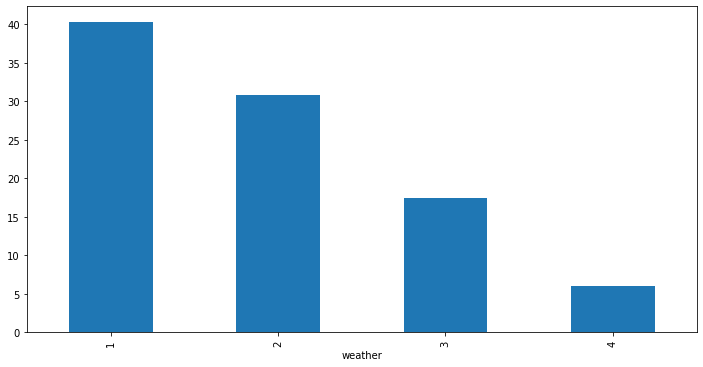

In [19]:
df.groupby('weather')['casual'].mean().plot.bar()

1

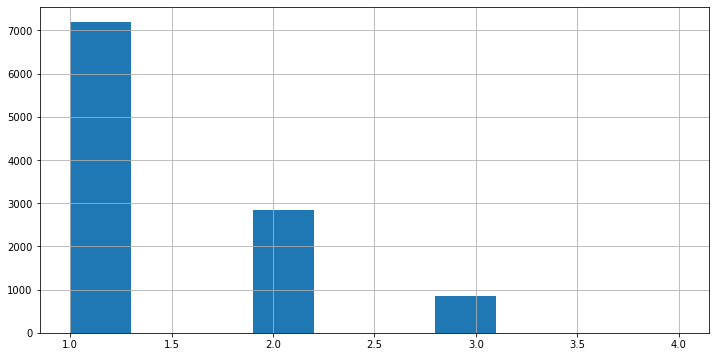

In [20]:
df['weather'].hist()  # weather distribution
len(df[df['weather']==4])                                 # only one datapoint with weather = 4

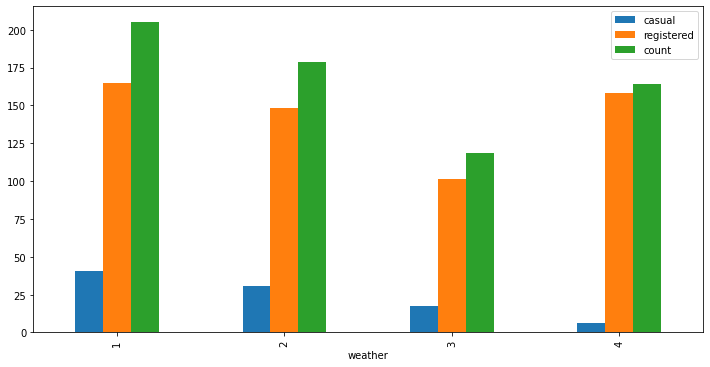

In [21]:
df.groupby('weather')[['casual','registered','count']].mean().plot.bar() # weather = 4 can be disregarded (see above)

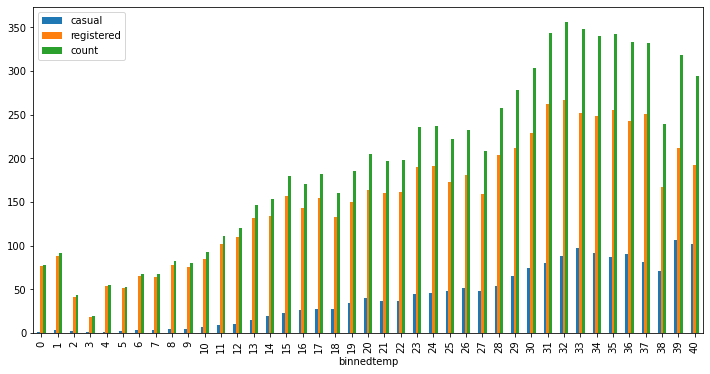

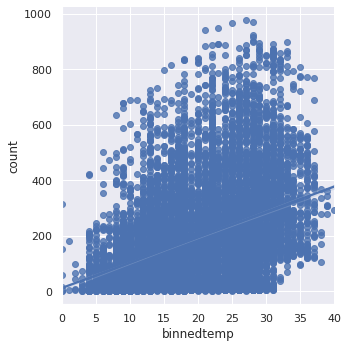

In [20]:
bins = list(range(42))                                          # distribute temp into bins of 1 degrees
df['binnedtemp']=pd.cut(df['temp'], bins, labels=False)
#df.head(50)
df.groupby('binnedtemp')[['casual','registered','count']].mean().plot.bar() # average rentals per hour for different temperatures 
sns.set(rc={'figure.figsize':(20,15)})
sns.lmplot(x='binnedtemp', y='count', data = df)  #, data=df['2011-01-01':'2011-02-01']

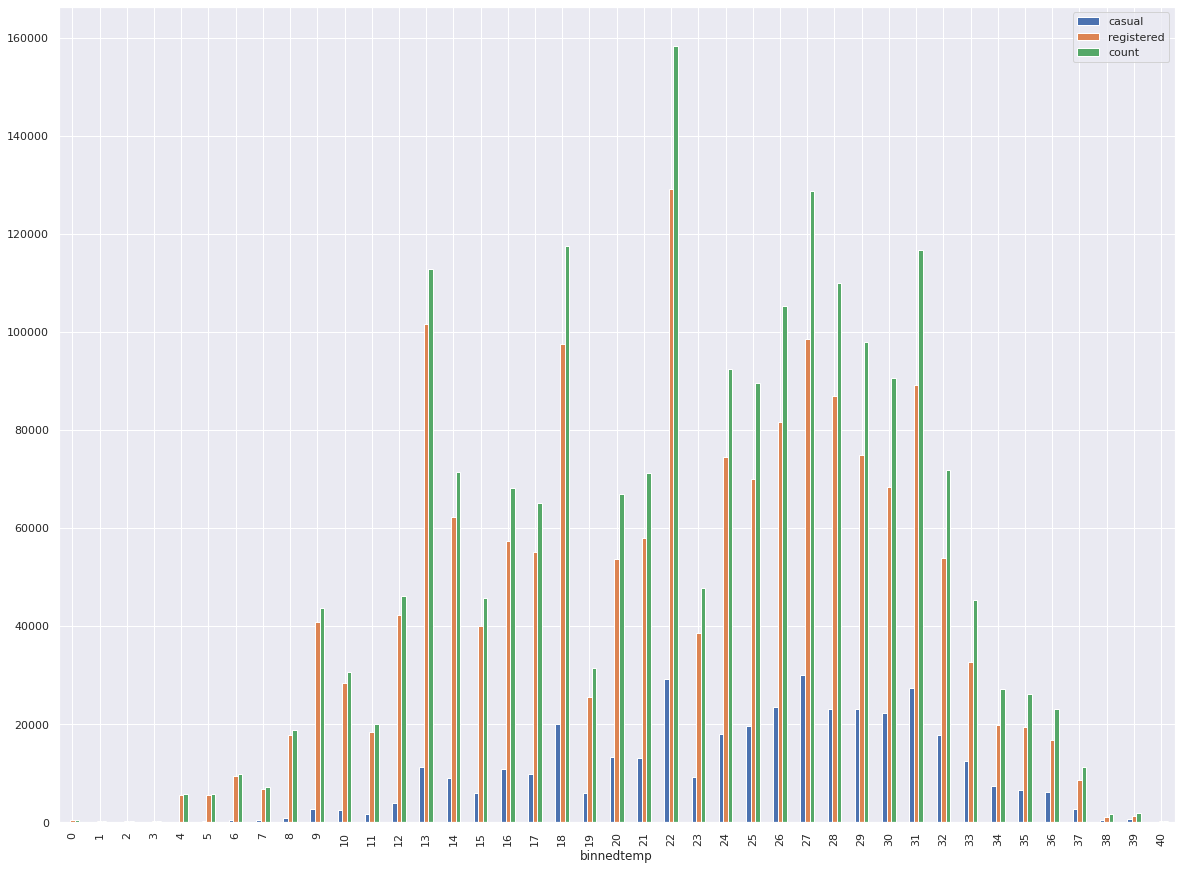

In [21]:
df.groupby('binnedtemp')[['casual','registered','count']].sum().plot.bar() # total number of rents for temperatures in the full period

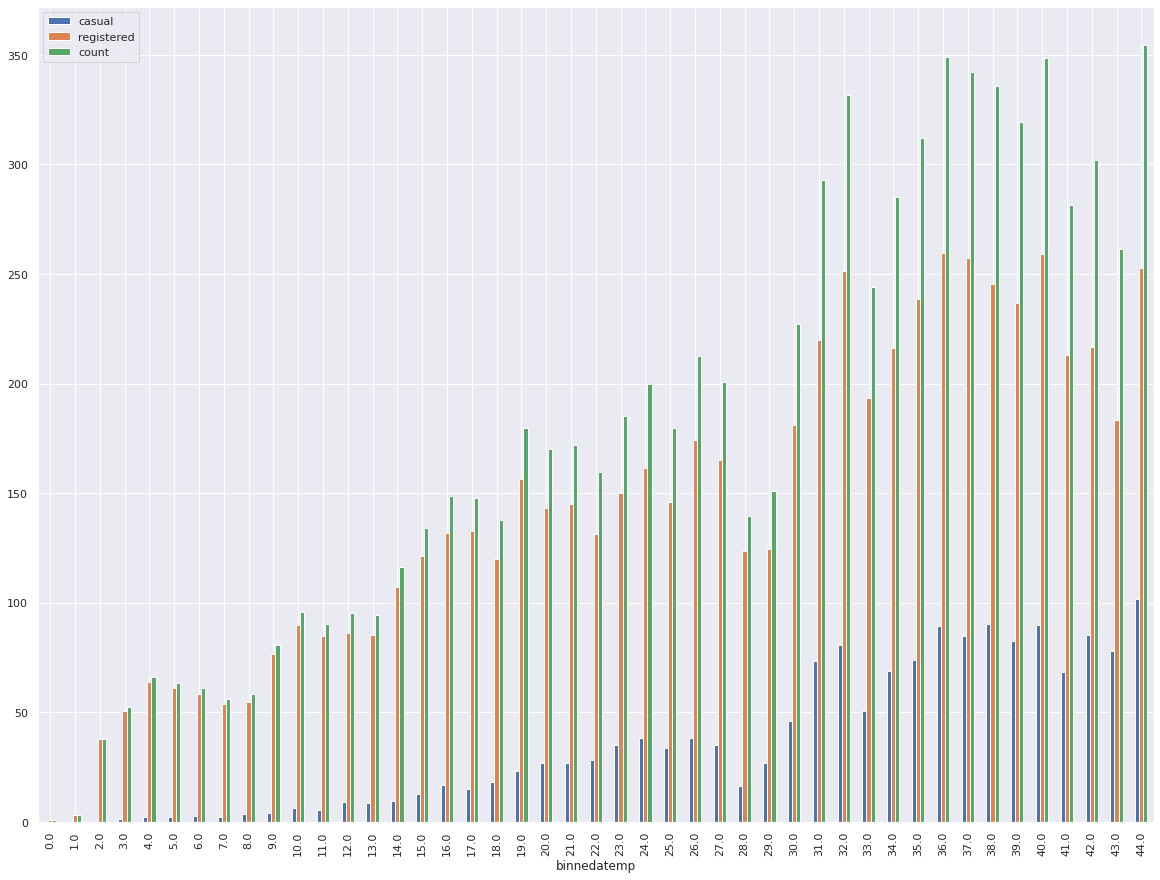

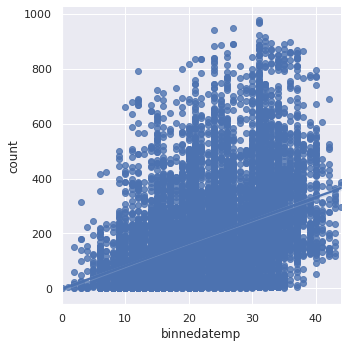

In [35]:
bins = list(range(46))                                          # distribute temp into bins of 1 degrees
df['binnedatemp']=pd.cut(df['atemp'], bins, labels=False)
#df.head(50)
df.groupby('binnedatemp')[['casual','registered','count']].mean().plot.bar() # average rentals per hour X "feels like" temperatures 
sns.set(rc={'figure.figsize':(20,15)})
sns.lmplot(x='binnedatemp', y='count', data = df)  #, data=df['2011-01-01':'2011-02-01']

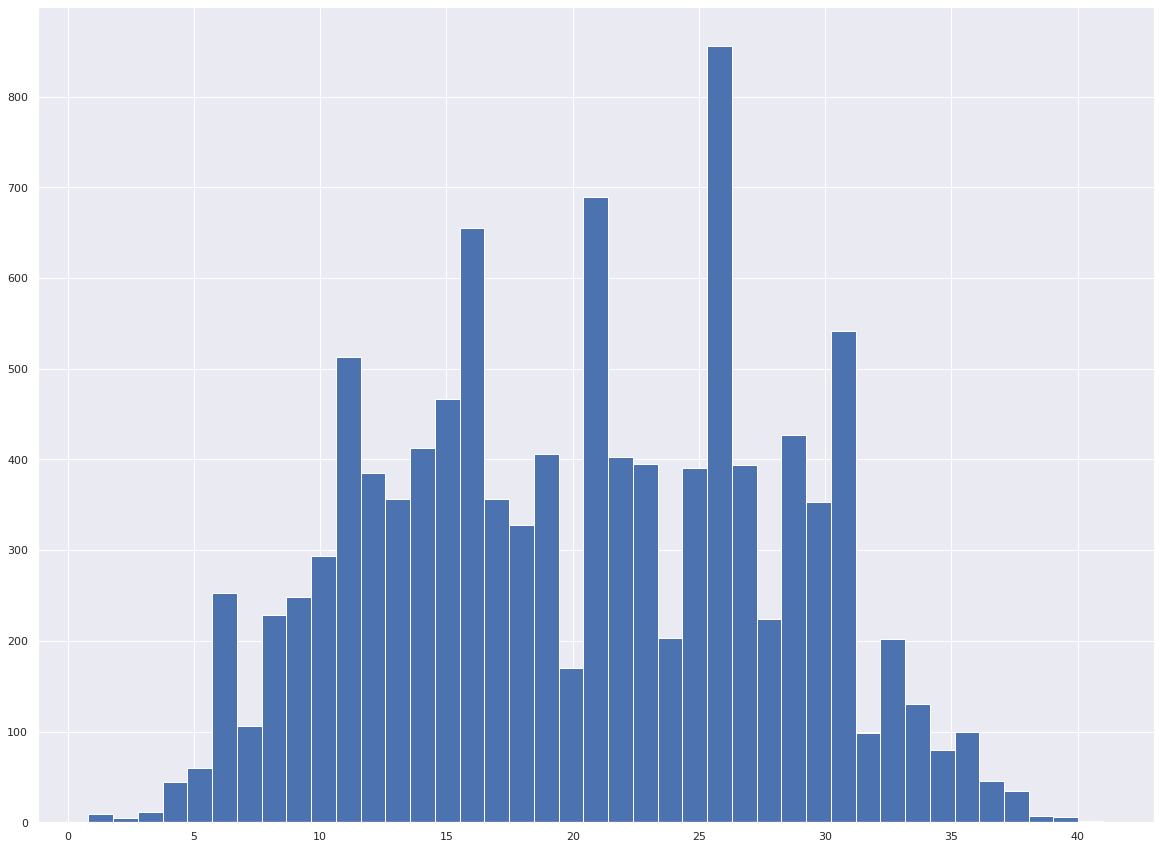

In [38]:
df['temp'].hist(bins=41)

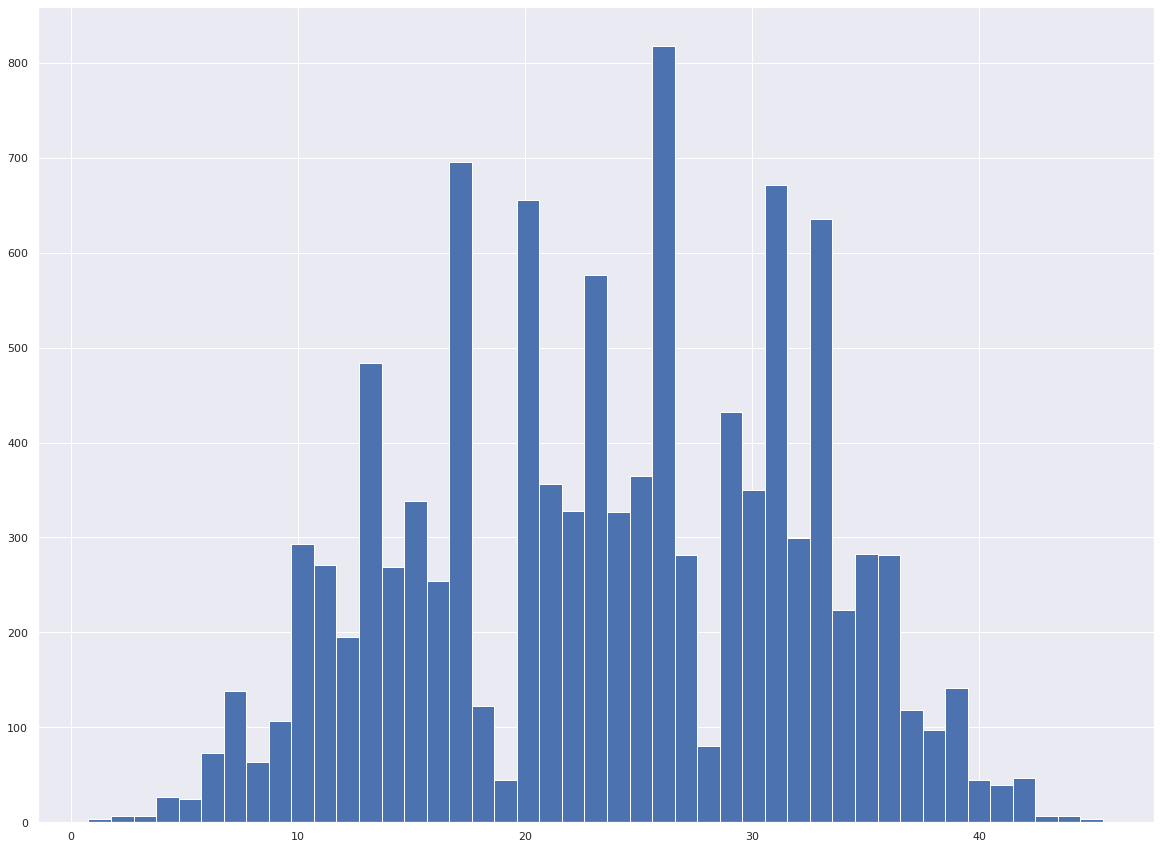

In [34]:
df['atemp'].hist(bins=45)

In [39]:
df['atemp'].max()

45.455

In [57]:
df['temp'].max()

41.0

In [71]:
df['hour']=df.index.hour
df['month']=df.index.month
df['dayofweek']=df.index.dayofweek

#df['hour']=df[index].hour

In [73]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,binnedtemp,binnedatemp,hour,month,dayofweek
datetime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,9,14.0,0,1,5
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,9,13.0,1,1,5
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,9,13.0,2,1,5
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,9,14.0,3,1,5
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,9,14.0,4,1,5


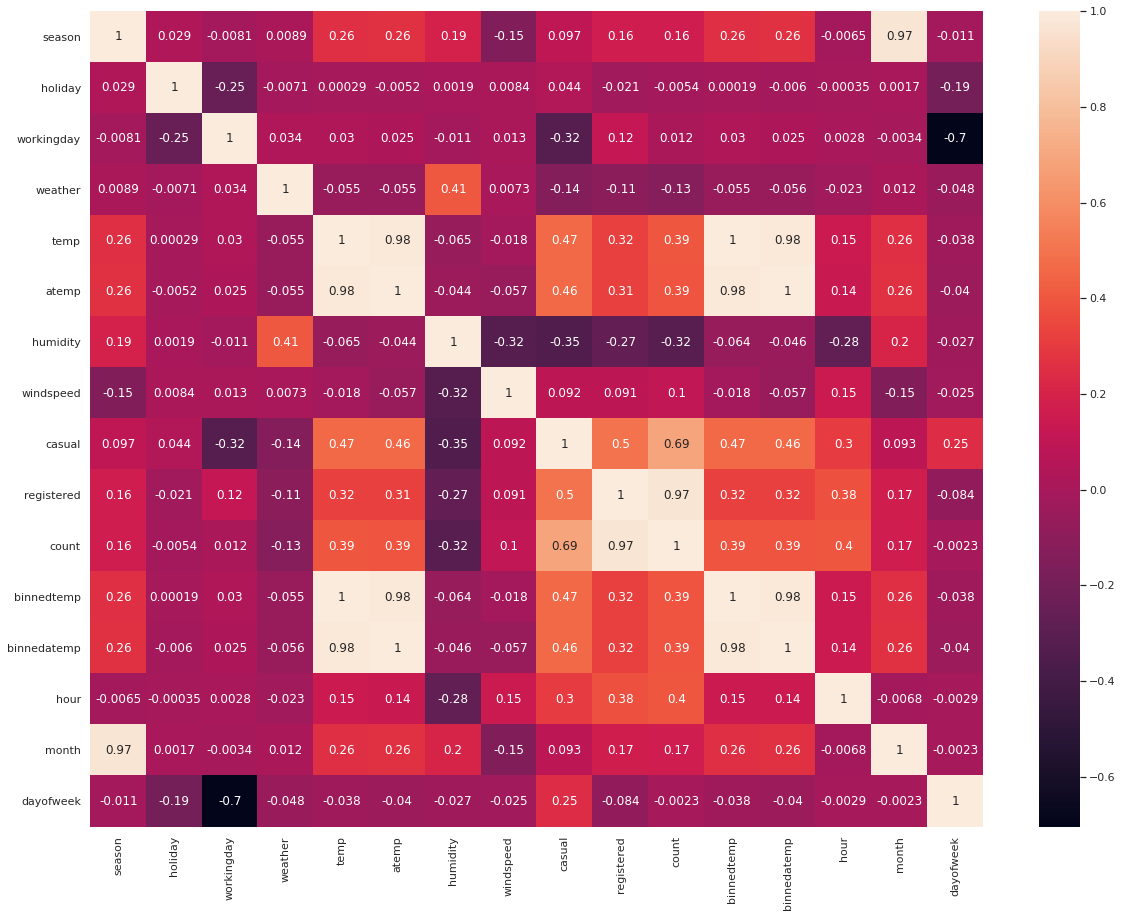

In [74]:
sns.heatmap(df.corr(), annot=True)

In [157]:
X = df[['season', 'workingday', 'weather', 'windspeed', 'hour', 'month', 'dayofweek','temp']]

In [155]:
X.head()

,season,workingday,weather,windspeed,hour,month,dayofweek
datetime,,,,,,,
2011-01-01 00:00:00,1,0,1,0.0,0,1,5
2011-01-01 01:00:00,1,0,1,0.0,1,1,5
2011-01-01 02:00:00,1,0,1,0.0,2,1,5
2011-01-01 03:00:00,1,0,1,0.0,3,1,5
2011-01-01 04:00:00,1,0,1,0.0,4,1,5


In [153]:
y1 = df['casual']                # we will predict casual and registered rentals separately
y2 = df['registered']

### Train - Test Split

In [134]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)

In [149]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=42) # note: X1_train = X2_train, and X1_test = X2_test

In [162]:
X1_train.describe()

,season,workingday,weather,windspeed,hour,month,dayofweek
count,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000
mean,2.507694,0.680983,1.416743,12.795542,11.547772,6.525264,3.019063
std,1.115295,0.466122,0.634073,8.200255,6.922209,3.434726,1.999737
min,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,0.000000,1.000000,7.001500,6.000000,4.000000,1.000000
50%,3.000000,1.000000,1.000000,12.998000,12.000000,7.000000,3.000000
75%,4.000000,1.000000,2.000000,16.997900,18.000000,10.000000,5.000000
max,4.000000,1.000000,4.000000,56.996900,23.000000,12.000000,6.000000


In [164]:
data1 = X1_train.join(pd.Series(y1_train, name='casual'))

In [165]:
data2 = X2_train.join(pd.Series(y2_train, name='registered'))

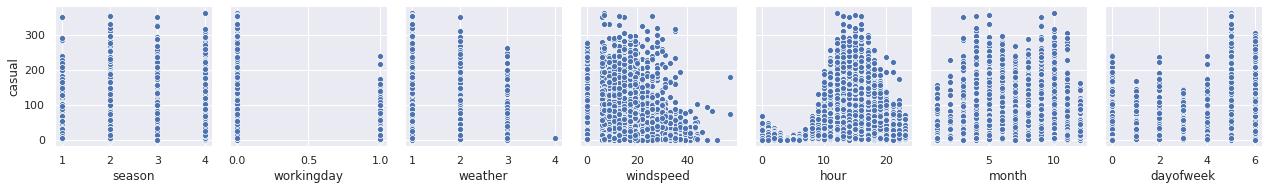

In [170]:
sns.pairplot(data1, x_vars=X.columns, y_vars=['casual'])

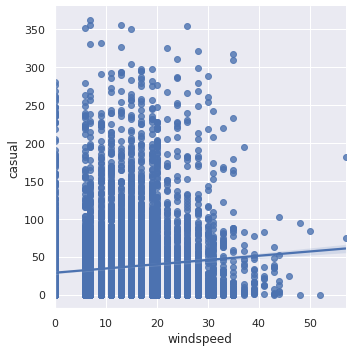

In [178]:
sns.lmplot(x='windspeed', y='casual', data = data1)

In [136]:
# check variance inflation factor:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import add_constant

In [137]:
X_vif = add_constant(X1_train)

pd.Series([variance_inflation_factor(X_vif.values, i) 
            for i in range(X_vif.shape[1])], 
            index=X_vif.columns)

const         34.614445
season        17.954717
workingday     1.984615
weather        1.003386
windspeed      1.046170
hour           1.023707
month         17.962946
dayofweek      1.988540
dtype: float64

In [139]:
from sklearn.linear_model import LinearRegression

lin_reg_wo = LinearRegression()
lin_reg_wo.fit(X1_train, y1_train)

LinearRegression()

In [140]:
lin_reg_wo.score(X1_train, y1_train)

0.22521849564208196

In [146]:
lin_reg_wo = LinearRegression()
lin_reg_wo.fit(X2_train, y2_train)

LinearRegression()

In [148]:
lin_reg_wo.score(X2_train, y2_train)

-0.577862596244987

In [117]:
from sklearn import ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error

In [118]:
scaler = MinMaxScaler()
X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.transform(X1_test)

In [120]:
params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

In [122]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X1_train, y1_train)

mse = mean_squared_error(y1_test, reg.predict(X1_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 590.9390


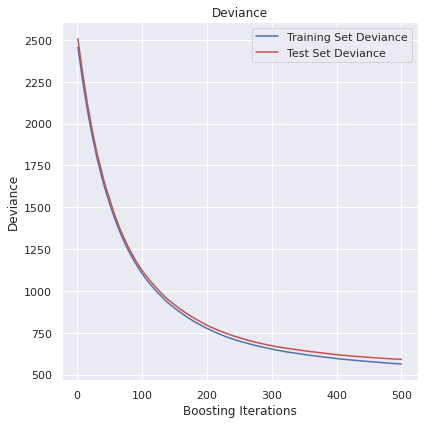

In [127]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X1_test)):
    test_score[i] = reg.loss_(y1_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, reg.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

AttributeError: 'DataFrame' object has no attribute 'feature_names'

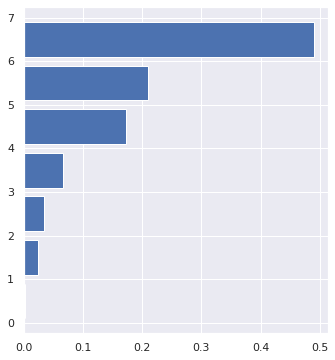

In [129]:
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(df.feature_names)[sorted_idx])
plt.title('Feature Importance (MDI)')

result = permutation_importance(reg, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=np.array(df.feature_names)[sorted_idx])
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()